<a href="https://colab.research.google.com/github/Anchaliya75/Brain-Computer-Interface/blob/main/testA7e_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader as dl
import matplotlib.pyplot as plt
from torchinfo import summary


In [91]:
from scipy.io import loadmat
matfile  ="/content/drive/MyDrive/BCI Competition IV 2a dataset/BCI/A01T.mat"
matfile2 ="/content/drive/MyDrive/BCI Competition IV 2a dataset/BCI/A02T.mat"
matfile3= "/content/drive/MyDrive/BCI Competition IV 2a dataset/BCI/A03T.mat"
matfile4 = "/content/drive/MyDrive/BCI Competition IV 2a dataset/BCI/A04T.mat"
matfile5 = "/content/drive/MyDrive/BCI Competition IV 2a dataset/BCI/A05T.mat"
matfile6= "/content/drive/MyDrive/BCI Competition IV 2a dataset/BCI/A06T.mat"
matfile7 = "/content/drive/MyDrive/BCI Competition IV 2a dataset/BCI/A07T.mat"
matfile8 ="/content/drive/MyDrive/BCI Competition IV 2a dataset/BCI/A08T.mat"
matfile9 = "/content/drive/MyDrive/BCI Competition IV 2a dataset/BCI/A09T.mat"
matfilee1="/content/drive/MyDrive/BCI Competition IV 2a dataset/BCI/A01E.mat"
matfilee2= "/content/drive/MyDrive/BCI Competition IV 2a dataset/BCI/A02E.mat"
matfilee3="/content/drive/MyDrive/BCI Competition IV 2a dataset/BCI/A03E.mat"
matfilee4="/content/drive/MyDrive/BCI Competition IV 2a dataset/BCI/A04E.mat"
matfilee5="/content/drive/MyDrive/BCI Competition IV 2a dataset/BCI/A05E.mat"
matfilee6="/content/drive/MyDrive/BCI Competition IV 2a dataset/BCI/A06E.mat"
matfilee7="/content/drive/MyDrive/BCI Competition IV 2a dataset/BCI/A07E.mat"
matfilee8="/content/drive/MyDrive/BCI Competition IV 2a dataset/BCI/A08E.mat"
matfilee9="/content/drive/MyDrive/BCI Competition IV 2a dataset/BCI/A09T.mat"
data1 = loadmat(matfile)['data']
data2 = loadmat(matfile2)['data']
data3 = loadmat(matfile3)['data']
data4 = loadmat(matfile4)['data']
data5 = loadmat(matfile5)['data']
data6 = loadmat(matfile6)['data']
data7 = loadmat(matfile7)['data']
data8 = loadmat(matfile8)['data']
data9 = loadmat(matfile9)['data']
data1e= loadmat(matfilee1)['data']
data2e= loadmat(matfilee2)['data']
data3e= loadmat(matfilee3)['data']
data4e= loadmat(matfilee4)['data']
data5e= loadmat(matfilee5)['data']
data6e= loadmat(matfilee6)['data']
data7e= loadmat(matfilee7)['data']
data8e= loadmat(matfilee8)['data']
data9e= loadmat(matfilee9)['data']


#Removing data3e due to smaller data-interval

# all_data = [data1,data2,data3,data4,data5,data6,data7,data8,data9]
# all_data_test =[data1e,data2e,data3e,data4e,data5e,data6e,data7e,data8e,data9e]
all_data  = [data1,data2,data3,data4,data5,data6,data7,data8,data9,data1e,data2e,data3e,data5e,data6e,data8e,data9e]
all_data_test = [data7e]
# Doing Cross Validation on all

In [92]:
batch_size=288

In [93]:
def sampling(x):
  mini =1e9
  ma=0
  for  i in range(len(x)):
        mini =min(mini,x[i].shape[0])
        x_updated=[]
  for i  in range(len(x)):
        x_a = x[i][:mini-5]
        x_updated.append(x_a)
     
  return x_updated




In [94]:
def converting_mat_to_tensors(all_data,x,y):
  subjects  = len(all_data)
  for  a  in tqdm(range(subjects)):
      data = all_data[a]
      
      if(a==3):
        
        
        for i in range(1,7):
          samples = data[0,i][0,0][1]
          n =len(samples)
          prev= data[0,i][0,0][1][0][0]
          for j in range(1,n):
            take  = data[0,i][0,0][1][j][0]
            x.append(data[0,i][0,0][0][prev:take,0:22])
            y.append(data[0,i][0,0][2][j-1][0])
            prev = take
          x.append(data[0,i][0,0][0][prev:,0:22]) 
          y.append(data[0,i][0,0][2][j][0])

      else:
        
        for i in range(3,9):
          samples = data[0,i][0,0][1]
          n =len(samples)
          prev= data[0,i][0,0][1][0][0]
          for j in range(1,n):
            take  = data[0,i][0,0][1][j][0]
            x.append(data[0,i][0,0][0][prev:take,0:22])
            y.append(data[0,i][0,0][2][j-1][0])
            prev = take
          x.append(data[0,i][0,0][0][prev:,0:22]) 
          y.append(data[0,i][0,0][2][j][0])
  a=sampling(x)
  a=torch.tensor(a)
  dim1=a.shape[0]
  dim2=a.shape[1]
  dim3=a.shape[2]
  a=a.reshape(dim1,1,dim2,dim3)
  return a,torch.tensor(y)
  
  
  


In [95]:
def converting_mat_to_tensors_test(all_data,x,y):
  subjects  = len(all_data)
  for  a  in tqdm(range(subjects)):
      data = all_data[a]
      
      if(a==3):
        
        for i in range(3,9):
          samples = data[0,i][0,0][1]
          n =len(samples)
          prev= data[0,i][0,0][1][0][0]
          for j in range(1,n):
            take  = data[0,i][0,0][1][j][0]
            x.append(data[0,i][0,0][0][prev:take,0:22])
            y.append(data[0,i][0,0][2][j-1][0])
            prev = take
          x.append(data[0,i][0,0][0][prev:,0:22]) 
          y.append(data[0,i][0,0][2][j][0])

      else:
        
        for i in range(3,9):
          samples = data[0,i][0,0][1]
          n =len(samples)
          prev= data[0,i][0,0][1][0][0]
          for j in range(1,n):
            take  = data[0,i][0,0][1][j][0]
            x.append(data[0,i][0,0][0][prev:take,0:22])
            y.append(data[0,i][0,0][2][j-1][0])
            prev = take
          x.append(data[0,i][0,0][0][prev:,0:22]) 
          y.append(data[0,i][0,0][2][j][0])
  a=sampling(x)
  a=torch.tensor(a)
  dim1=a.shape[0]
  dim2=a.shape[1]
  dim3=a.shape[2]
  a=a.reshape(dim1,1,dim2,dim3)
  return a,torch.tensor(y)
  
  
  


In [96]:
def preperation_for_dataloader(x,y):
  array=[]
  for i in range(len(y)):
    array.append((x[i],y[i]))
  return array


In [97]:
x,y=converting_mat_to_tensors(all_data,[],[])


  0%|          | 0/16 [00:00<?, ?it/s]

In [98]:
x.shape

torch.Size([4608, 1, 1890, 22])

In [99]:
data_loader_prep = preperation_for_dataloader(x,y)


In [ ]:
# (a,b)=data_loader_prep[0]
# print(a.size())

In [100]:
train_batch = dl(data_loader_prep ,batch_size=288)

In [101]:
for idx,(a,b) in enumerate(train_batch):
  print(a.shape)
  print(b.shape)
  break

torch.Size([288, 1, 1890, 22])
torch.Size([288])


In [105]:
class BCI(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(in_channels=1 ,out_channels=3,kernel_size=3 ,padding =1)
    self.maxpool =nn.MaxPool2d(2)
    self.linear1 = nn.Linear(945*11*3,500)
    self.linear2=nn.Linear(500,125)
    self.linear3=nn.Linear(125,5)
  def forward(self,input_data):
    # print(input_data.shape)
    x= self.conv1(input_data)
    # print(x.shape)
    x= self.maxpool(x)
    # print(x.shape)
    x=x.reshape(288,-1)
    x= F.relu(self.linear1(x))
    x=F.relu(self.linear2(x))
    x=self.linear3(x)
    return x



In [106]:
brain = BCI()
lossfunction  =nn.CrossEntropyLoss()
optimizer = optim.Adam(brain.parameters(),lr =0.001)

In [107]:
summary(brain,(288,1,1890,22))

Layer (type:depth-idx)                   Output Shape              Param #
BCI                                      [288, 5]                  --
├─Conv2d: 1-1                            [288, 3, 1890, 22]        30
├─MaxPool2d: 1-2                         [288, 3, 945, 11]         --
├─Linear: 1-3                            [288, 500]                15,593,000
├─Linear: 1-4                            [288, 125]                62,625
├─Linear: 1-5                            [288, 5]                  630
Total params: 15,656,285
Trainable params: 15,656,285
Non-trainable params: 0
Total mult-adds (G): 4.87
Input size (MB): 47.90
Forward/backward pass size (MB): 288.85
Params size (MB): 62.63
Estimated Total Size (MB): 399.38

In [122]:
loss_array=[]
epochs_array=[]
epochs = 15
for i in range(epochs):
    epochs_array.append(i+1)

for  i in range(epochs):
  one_epoch_loss =0
  cnt =0
  for idx,(x_train,y_train) in enumerate(train_batch):
    # print(x_train.size())
    cnt+=1
    brain.zero_grad()
    prediction =brain.forward(x_train.float())
    loss=lossfunction(prediction,y_train)
    h=loss
    one_epoch_loss += float(h.item())
    loss.backward()
    optimizer.step()
  one_epoch_loss = one_epoch_loss/cnt
  loss_array.append(one_epoch_loss)
  

    



In [123]:

loss_array

[1.289158396422863,
 1.1282379105687141,
 1.0688595660030842,
 1.0504818744957447,
 0.9543762877583504,
 0.9639383517205715,
 1.0030908472836018,
 0.8721279744058847,
 0.7909681554883718,
 0.7209124360233545,
 0.6427460052073002,
 0.5990016320720315,
 0.49526112526655197,
 0.4830149323679507,
 0.48573050322011113]

In [125]:
epochs_array

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

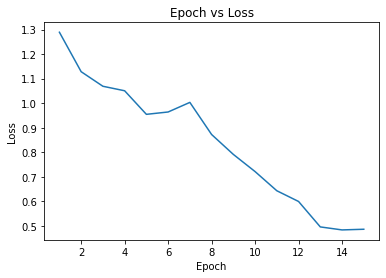

In [128]:
plt.plot(epochs_array, loss_array)
# plt.figure(figsize=(16,9))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.show()

In [129]:
x_test,y_test = converting_mat_to_tensors_test(all_data_test,[],[])

  0%|          | 0/1 [00:00<?, ?it/s]

In [130]:
data_loader_prep_test = preperation_for_dataloader(x_test,y_test)


In [131]:
test_batch = dl(data_loader_prep_test ,batch_size=288)

In [132]:
correct_train =0
total_train =0
with torch.no_grad():
  for idx,(x_train,y_train) in enumerate(train_batch):
    prediction = brain.forward(x_train.float())
    
    for idx,predicted_probability in enumerate(prediction):
      if(torch.argmax(predicted_probability)==y_train[idx]):
        correct_train+=1
      total_train+=1


In [133]:
print(correct_train)

3914


In [134]:
print(total_train)

4608


In [135]:
print("Training accuracy is",correct_train/total_train)

Training accuracy is 0.8493923611111112


In [ ]:
def make_plot(y):
  n=len(y)
  y=np.array(y)

  x=[]
  for i in range(n):
    x.append(i+1)
  x=np.array(x)
  plt.plot(x,y,x_label="no_of_epochs",y_label="training_loss")
  


In [136]:
correct =0
total =0
with torch.no_grad():
  for idx,(x_test,y_test) in enumerate(test_batch):
    prediction = brain.forward(x_test.float())
    
    for idx,predicted_probability in enumerate(prediction):
      if(torch.argmax(predicted_probability)==y_test[idx]):
        correct+=1
      total+=1


In [137]:

print("Test accuracy is",correct/total)

Test accuracy is 0.3888888888888889
